### Import Required Libraries
This cell imports the necessary libraries for data manipulation, visualization, and setting up the environment.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visualization
sns.set(style="whitegrid")
%matplotlib inline

In [195]:
# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load and Clean Dataset
This cell loads the dataset, removes unnecessary columns, and displays the dataset's shape.

In [196]:
# Load the dataset
df = pd.read_csv('census_data.csv')

# Drop replicate weight columns
replicate_cols = [col for col in df.columns if 'weight_replicate' in col]
df = df.drop(columns=replicate_cols)

# Display the shape of the DataFrame
print("Dataset Shape:", df.shape)

Dataset Shape: (6868, 206)


### Display Dataset Information
This cell displays basic information about the dataset, including column data types and non-null counts.

In [197]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Columns: 206 entries, record_type to immigration_year_flag
dtypes: float64(84), int64(118), object(4)
memory usage: 10.8+ MB
None


### Preview Dataset
This cell displays the first few rows of the dataset.

In [198]:
# Display the first few rows
print(df.head())

  record_type   household_id  census_division  person_id  puma_area  \
0           P  2023GQ0000108                9          1        101   
1           P  2023GQ0000169                9          1        102   
2           P  2023GQ0000878                9          1        300   
3           P  2023GQ0001081                9          1        300   
4           P  2023GQ0001269                9          1        400   

   census_region  state_code  income_adjustment  age_years  \
0              4           2            1019518         71   
1              4           2            1019518         90   
2              4           2            1019518         90   
3              4           2            1019518         22   
4              4           2            1019518         49   

   citizenship_status  ...  self-employment_income_flag  sex_flag  \
0                   1  ...                            0         0   
1                   1  ...                            0       

### Check for Missing Values
This cell checks for missing values in each column and displays columns with missing values.

In [199]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])
# print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 naturalization_year         6643
employment_class            2744
self_care_issue              401
independent_living_issue    1300
mobility_issue               401
                            ... 
soc_occupation              2744
veteran_service_period      6150
medicare_coverage_given     5646
medicaid_coverage_given     4698
tricare_coverage_given      6231
Length: 86, dtype: int64


### Classify Columns
This cell classifies columns into categorical and numerical based on the number of unique values.

In [200]:
# Classify columns based on unique values
categorical_cols = [col for col in df.columns if df[col].nunique() < 20]
numerical_cols = [col for col in df.columns if df[col].nunique() >= 20]

print("Categorical Columns (Count):", len(categorical_cols))
print("Numerical Columns (Count):", len(numerical_cols))
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns (Count): 169
Numerical Columns (Count): 37

Categorical Columns: ['record_type', 'census_division', 'person_id', 'puma_area', 'census_region', 'state_code', 'income_adjustment', 'citizenship_status', 'employment_class', 'self_care_issue', 'hearing_problem', 'vision_problem', 'independent_living_issue', 'mobility_issue', 'veteran_disability_rate_2', 'veteran_disability_rate_2.1', 'cognitive_issue', 'english_proficiency', 'recent_birth', 'grandparents_cohab', 'grandcare_duration', 'grandcare_responsible', 'subsidized_health_plan', 'employer_health_ins', 'private_health_ins', 'medicare_coverage', 'medicaid_coverage', 'military_health_ins', 'va_health_coverage', 'indian_health_service', 'vehicle_occupants', 'transport_mode', 'other_language_home', 'marital_status', 'recent_divorce', 'recent_marriage', 'marriage_count', 'recent_widowhood', 'residence_change', 'military_service_status', 'post_9_11_service', 'gulf_war_service', 'service_1975_1990', 'vietnam_era_service', '

### Summary Statistics
This cell computes and displays summary statistics for numerical columns.

In [201]:
# Summary statistics for numerical columns
print(df[numerical_cols].describe())

         age_years  naturalization_year  investment_income  commute_time  \
count  6868.000000           225.000000        5568.000000   2694.000000   
mean     38.869685          1999.671111        3665.996767     16.047142   
std      23.267968            16.069001       20596.225488     22.823537   
min       0.000000          1947.000000       -1200.000000      1.000000   
25%      18.000000          1988.000000           0.000000      5.000000   
50%      38.000000          2004.000000           0.000000     10.000000   
75%      59.000000          2010.000000        1600.000000     20.000000   
max      90.000000          2023.000000      208000.000000    179.000000   

       last_marriage_year  other_income_12m  public_assist_12m  \
count         3453.000000       5568.000000        5568.000000   
mean          1997.739357       1532.607759         115.964440   
std             16.724087       4789.455203         897.057223   
min           1950.000000          0.000000        

### Check Value Counts
This cell checks the value counts for potential coded columns.

In [202]:
# Check value counts for potential coded columns
for col in ['poverty_ratio', 'migration_puma_area', 'race_detail_2_3.1', 'home_language']:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts().head(10))


poverty_ratio Value Counts:
poverty_ratio
501.0    1878
0.0        61
149.0      35
151.0      33
58.0       32
134.0      31
128.0      30
276.0      30
243.0      30
233.0      27
Name: count, dtype: int64

migration_puma_area Value Counts:
migration_puma_area
400.0      229
100.0      192
200.0      141
300.0      112
1.0         29
2900.0      14
8626.0      13
7300.0      12
23300.0     11
1300.0      11
Name: count, dtype: int64

race_detail_2_3.1 Value Counts:
race_detail_2_3.1
1000    3453
5022    1738
9000     850
4008     201
8000     148
3000     143
5023     104
5024      59
4003      23
5013      20
Name: count, dtype: int64

home_language Value Counts:
home_language
6800.0    555
1200.0    173
2920.0    114
7124.0     69
2910.0     36
1250.0     26
2575.0     26
1110.0     21
4500.0     17
1260.0     12
Name: count, dtype: int64


### Count Specific Value
This cell counts the occurrences of a specific value in the 'migration_puma_area' column.

In [203]:
print("migration_puma_area 70000 Count:")
print((df['migration_puma_area'] == 70000).sum())

migration_puma_area 70000 Count:
4


### Create Clean Copy and Replace Special Codes
This cell creates a clean copy of the dataset and replaces special codes with NaN.

In [204]:
# Create clean copy
df_clean = df.copy()

# Replace special codes
df_clean['poverty_ratio'] = df_clean['poverty_ratio'].replace(501, np.nan)
df_clean['migration_puma_area'] = df_clean['migration_puma_area'].replace(70000, np.nan)

# Verify changes
print("Missing Values in Modified Columns:")
print(df_clean[['poverty_ratio', 'migration_puma_area']].isnull().sum())

Missing Values in Modified Columns:
poverty_ratio          2283
migration_puma_area    5911
dtype: int64


### Calculate and Drop Columns with High Missing Values
This cell calculates the percentage of missing values and drops columns with more than 90% missing values.

In [205]:
# Calculate missing percentage
missing_percent = df_clean.isnull().sum() / len(df_clean) * 100
print("Columns with >50% Missing Values:\n", missing_percent[missing_percent > 50])

# Drop columns with >90% missing
cols_to_drop = missing_percent[missing_percent > 90].index
df_clean = df_clean.drop(columns=cols_to_drop)
print("Shape after dropping high-missing columns:", df_clean.shape)

Columns with >50% Missing Values:
 naturalization_year            96.723937
veteran_disability_rate_2      97.408270
veteran_disability_rate_2.1    88.147932
english_proficiency            82.993593
recent_birth                   79.470006
grandcare_duration             98.281887
grandcare_responsible          96.840419
commute_time                   60.774607
vehicle_occupants              71.782178
transport_mode                 56.974374
post_9_11_service              89.545719
gulf_war_service               89.545719
service_1975_1990              89.545719
vietnam_era_service            89.545719
service_1955_1964              89.545719
korean_war_service             89.545719
pre_1950_service               89.545719
wwii_service                   89.545719
grade_level                    76.878276
immigration_year               92.516016
entry_decade                   92.516016
vehicle_count                  71.782178
parent_employment_status       77.999418
first_degree_field    

### Select Key Columns
This cell selects key columns for further analysis and confirms that 'education_level' is categorical.

In [206]:
# Select key columns
key_columns = [
    'age_years', 'gender', 'education_level', 'total_income_12m',
    'employment_status_code', 'census_region', 'race_detail_2_3',
    'citizenship_status', 'disability_status', 'marital_status',
    'wage_income_12m', 'commute_time', 'health_ins_coverage',
    'state_code', 'puma_area'
]
df_subset = df_clean[key_columns]
print("Subset Shape:", df_subset.shape)

# Confirm education_level is categorical
print("\nEducation Level Value Counts:")
print(df_subset['education_level'].value_counts().sort_index())

Subset Shape: (6868, 15)

Education Level Value Counts:
education_level
1.0      234
2.0       80
3.0       88
4.0       81
5.0       95
6.0       90
7.0      106
8.0       97
9.0       99
10.0      94
11.0     137
12.0     165
13.0     190
14.0     244
15.0      82
16.0    1637
17.0     266
18.0     349
19.0     866
20.0     367
21.0     808
22.0     319
23.0      75
24.0      67
Name: count, dtype: int64


### Check and Drop Rows with Excessive NaN
This cell checks for rows with more than 50% missing values and drops them.

In [207]:
# Check rows with excessive NaN
print("Rows with >50% missing values:", (df_subset.isnull().sum(axis=1) > 7).sum())

# Drop rows with >50% missing (7/15 columns)
df_subset = df_subset[df_subset.isnull().sum(axis=1) <= 7]
print("Subset Shape after row filtering:", df_subset.shape)

Rows with >50% missing values: 0
Subset Shape after row filtering: (6868, 15)


### Visualize Age Distribution
This cell visualizes the age distribution using a histogram.

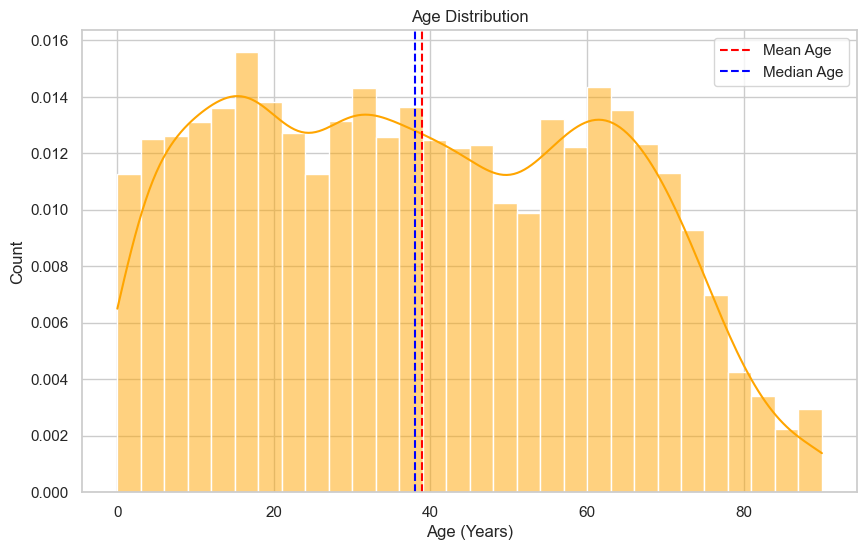

In [208]:
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['age_years'], bins=30, kde=True, color='orange', stat='density')
plt.axvline(df_subset['age_years'].mean(), color='red', linestyle='--', label='Mean Age')
plt.axvline(df_subset['age_years'].median(), color='blue', linestyle='--', label='Median Age')
plt.legend()
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

### Visualize Total Income Distribution
This cell visualizes the total income distribution using a histogram.

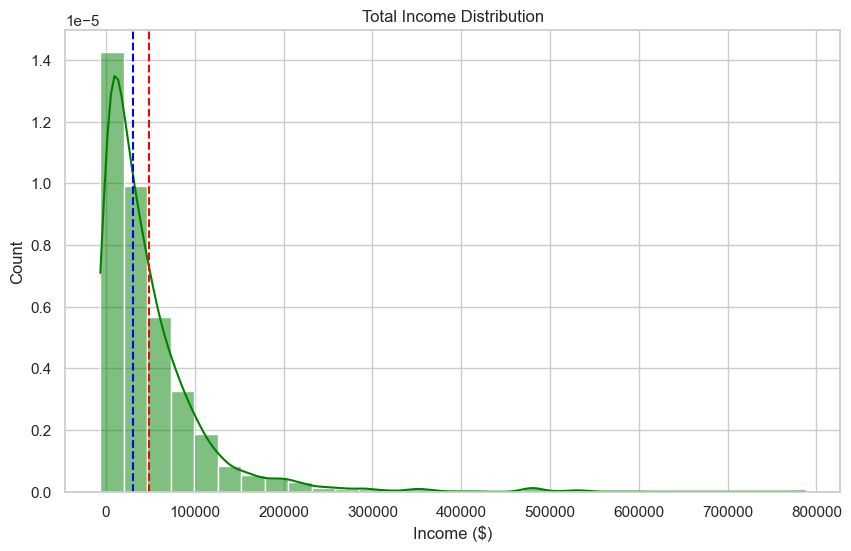

In [209]:
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['total_income_12m'].dropna(), bins=30, kde=True, color='green', stat='density')
plt.axvline(df_subset['total_income_12m'].mean(), color='red', linestyle='--', label='Mean Income')
plt.axvline(df_subset['total_income_12m'].median(), color='blue', linestyle='--', label='Median Income')
plt.title('Total Income Distribution')
plt.xlabel('Income ($)')
plt.ylabel('Count')
plt.show()

### Visualize Log-Transformed Total Income
This cell visualizes the log-transformed total income using a histogram.

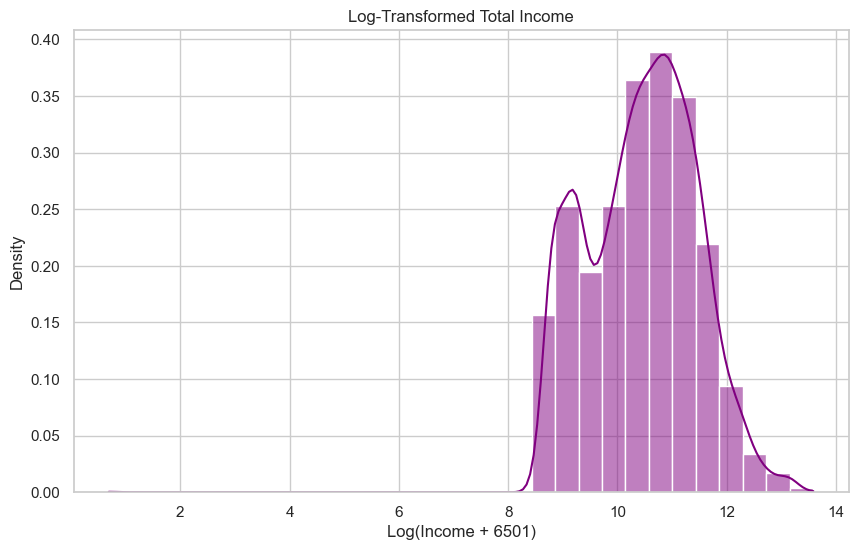

In [210]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_subset['total_income_12m'].dropna() + 6501), bins=30, kde=True, color='purple', stat='density')
plt.title('Log-Transformed Total Income')
plt.xlabel('Log(Income + 6501)')
plt.show()

### Visualize Age vs. Total Income
This cell visualizes the relationship between age and total income using a scatter plot.

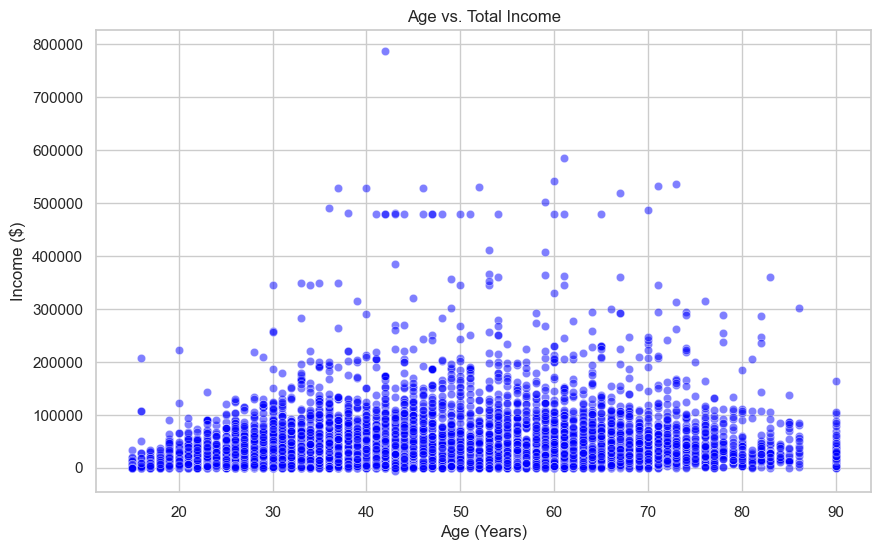

In [211]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_years', y='total_income_12m', data=df_subset, alpha=0.5, color='blue')
plt.title('Age vs. Total Income')
plt.xlabel('Age (Years)')
plt.ylabel('Income ($)')
plt.show()

### Visualize Gender Distribution
This cell visualizes the gender distribution using a count plot.

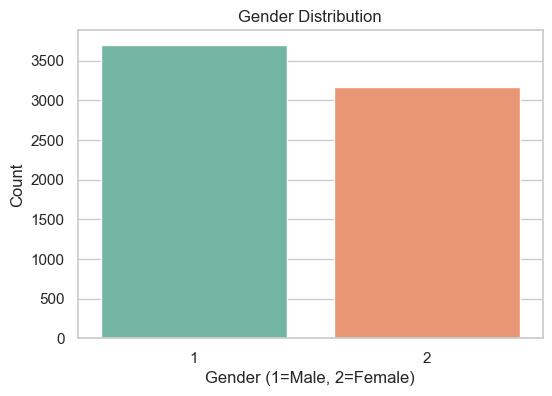

In [212]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df_subset, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()

### Visualize Total Income by Education Level
This cell visualizes the total income by education level using a box plot.

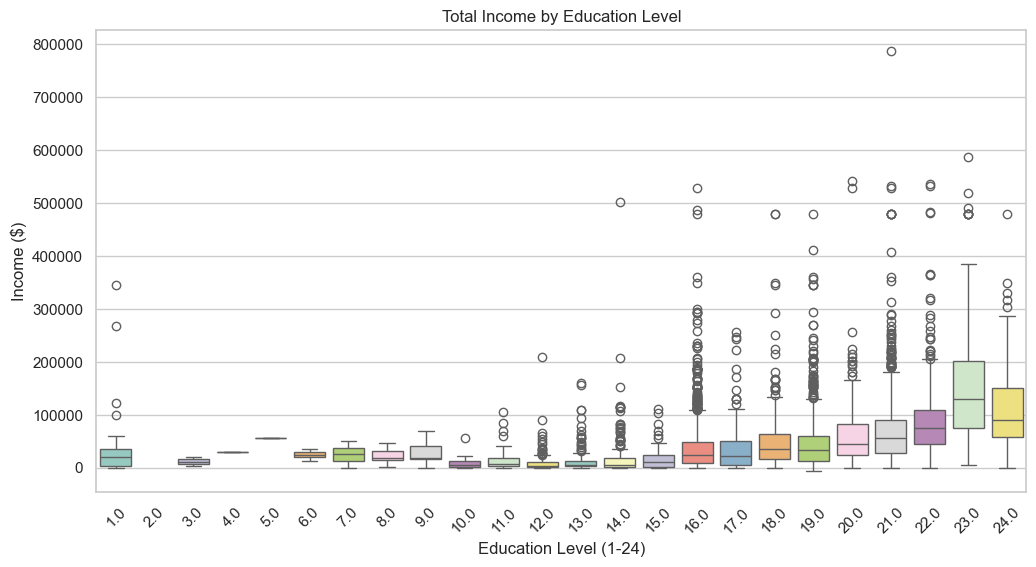

In [213]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education_level', y='total_income_12m', data=df_subset, palette='Set3')
plt.title('Total Income by Education Level')
plt.xlabel('Education Level (1-24)')
plt.ylabel('Income ($)')
plt.xticks(rotation=45)
plt.show()

### Visualize Employment Status Distribution
This cell visualizes the employment status distribution using a count plot.

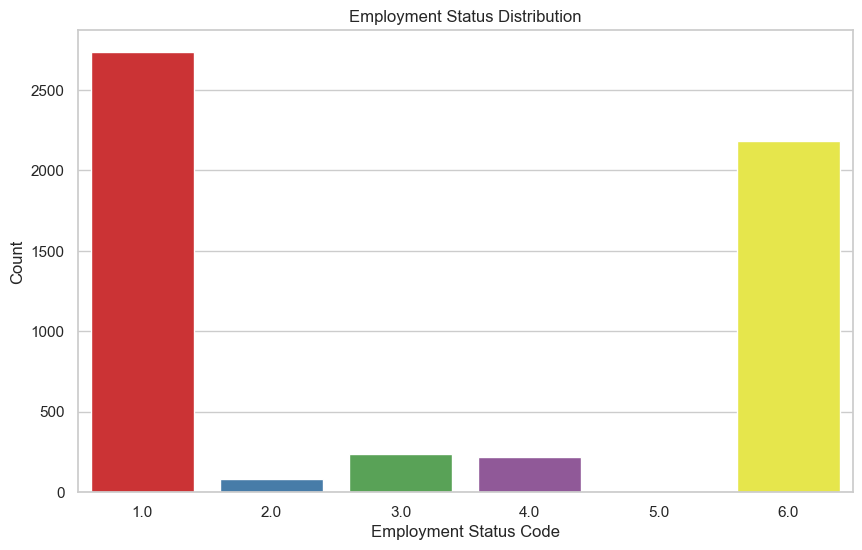

In [214]:
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status_code', data=df_subset, palette='Set1')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status Code')
plt.ylabel('Count')
plt.show()

### Visualize Correlation Heatmap
This cell visualizes the correlation heatmap for numerical columns.

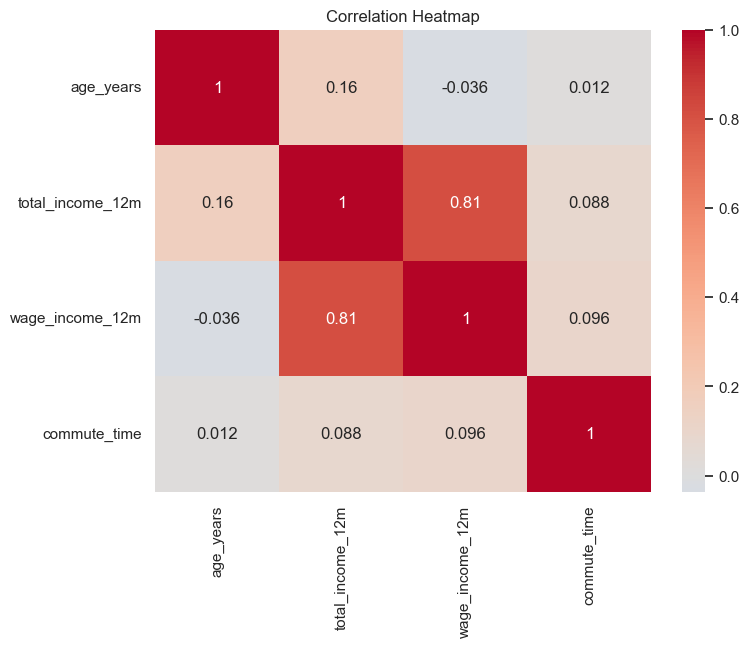

In [215]:
numerical_subset = ['age_years', 'total_income_12m', 'wage_income_12m', 'commute_time']
plt.figure(figsize=(8, 6))
corr = df_subset[numerical_subset].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Visualize Total Income by Census Region
This cell visualizes the total income by census region using a box plot.

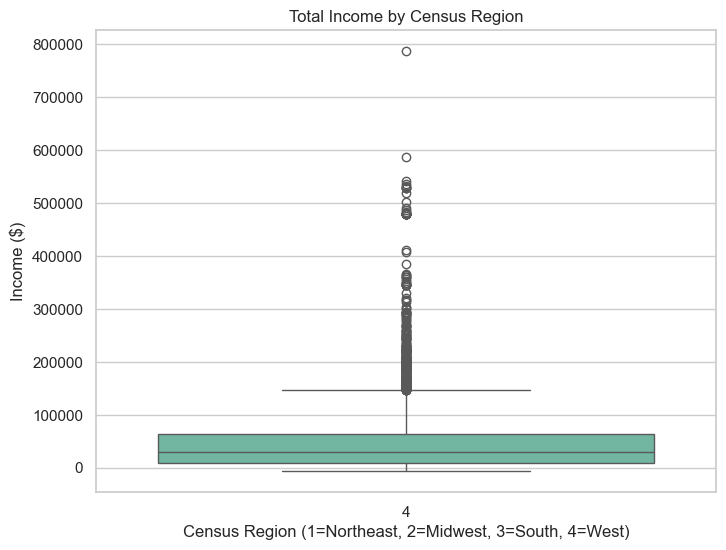

In [216]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='census_region', y='total_income_12m', data=df_subset, palette='Set2')
plt.title('Total Income by Census Region')
plt.xlabel('Census Region (1=Northeast, 2=Midwest, 3=South, 4=West)')
plt.ylabel('Income ($)')
plt.show()

### Impute Missing Values
This cell imputes missing values in the dataset using median for numerical columns and mode for categorical columns.

In [217]:
# Impute missing values
for col in df_subset.columns:
    if col in ['age_years', 'total_income_12m', 'wage_income_12m', 'commute_time', 'education_level']:
        df_subset[col].fillna(df_subset[col].median(), inplace=True)
    else:
        df_subset[col].fillna(df_subset[col].mode()[0], inplace=True)

# Verify final shape
print("Final Dataset Shape:", df_subset.shape)
print("Final Missing Values:\n", df_subset.isnull().sum())

# Save the cleaned dataset
df_subset.to_csv('census_data_cleaned.csv', index=False)

Final Dataset Shape: (6868, 15)
Final Missing Values:
 age_years                 0
gender                    0
education_level           0
total_income_12m          0
employment_status_code    0
census_region             0
race_detail_2_3           0
citizenship_status        0
disability_status         0
marital_status            0
wage_income_12m           0
commute_time              0
health_ins_coverage       0
state_code                0
puma_area                 0
dtype: int64


### NumPy Operations
This cell performs various operations on the 'age_years' column using NumPy.

In [218]:
import numpy as np

# Convert age_years to NumPy array
age_array = df_subset['age_years'].to_numpy()

# Operations
mean_age = np.mean(age_array)
std_age = np.std(age_array)
age_range = np.max(age_array) - np.min(age_array)

print("NumPy Stats for age_years:")
print(f"Mean: {mean_age:.2f}, Std: {std_age:.2f}, Range: {age_range}")

# Array operation: Normalize age
normalized_age = (age_array - mean_age) / std_age
print("\nFirst 5 Normalized Ages:", normalized_age[:5])

NumPy Stats for age_years:
Mean: 38.87, Std: 23.27, Range: 90

First 5 Normalized Ages: [ 1.38098238  2.19761508  2.19761508 -0.72507035  0.43540768]


### Calculate IQR and Identify Outliers
This cell calculates the interquartile range (IQR) for 'total_income_12m' and identifies outliers.

In [219]:
# Calculate IQR
Q1 = df_subset['total_income_12m'].quantile(0.25)
Q3 = df_subset['total_income_12m'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_subset[(df_subset['total_income_12m'] < lower_bound) | 
                     (df_subset['total_income_12m'] > upper_bound)]['total_income_12m']

print(f"IQR Outlier Bounds for total_income_12m: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Number of Outliers: {len(outliers)}")
print("Top 5 Outlier Values:\n", outliers.sort_values(ascending=False).head())


IQR Outlier Bounds for total_income_12m: [-44687.50, 112612.50]
Number of Outliers: 521
Top 5 Outlier Values:
 4623    787000.0
969     586150.0
4981    541000.0
4899    536900.0
1773    532900.0
Name: total_income_12m, dtype: float64


### Visualize Outliers with Box Plot
This cell visualizes the outliers in 'total_income_12m' using a box plot.

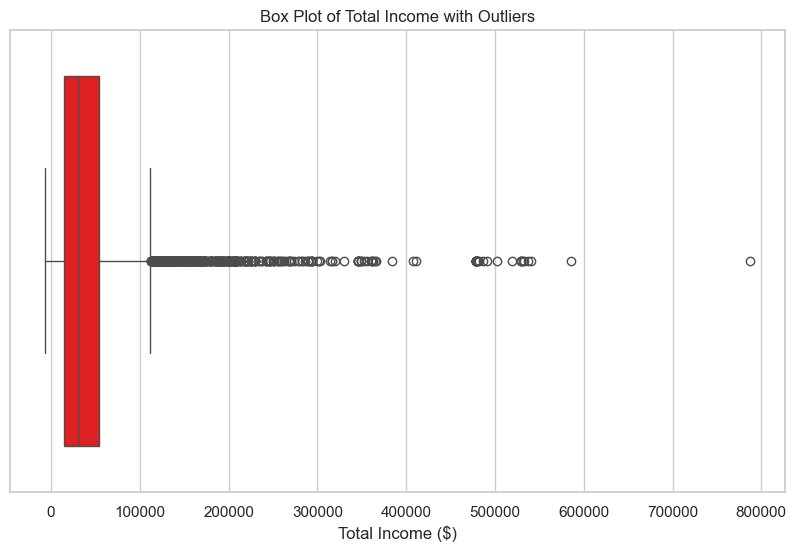

In [220]:

# Visualize with box plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_subset['total_income_12m'], color='red')
plt.title('Box Plot of Total Income with Outliers')
plt.xlabel('Total Income ($)')
plt.show()

### T-Test for Male vs. Female Income
This cell performs a Welch's t-test to compare the total income between males and females.

In [221]:
from scipy.stats import ttest_ind

male_income = df_subset[df_subset['gender'] == 1]['total_income_12m']
female_income = df_subset[df_subset['gender'] == 2]['total_income_12m']
t_stat, p_val = ttest_ind(male_income, female_income, equal_var=False)  # Welch’s t-test

print("T-Test (Male vs. Female Income):")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

T-Test (Male vs. Female Income):
T-statistic: 9.794, P-value: 0.000


### Chi-Squared Test for Employment Status vs. Gender
This cell performs a chi-squared test to examine the relationship between employment status and gender.

In [222]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_subset['employment_status_code'], df_subset['gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test (Employment Status vs. Gender):")
print(f"Chi2: {chi2:.3f}, P-value: {p:.3f}, Degrees of Freedom: {dof}")

Chi-Squared Test (Employment Status vs. Gender):
Chi2: 123.537, P-value: 0.000, Degrees of Freedom: 5


### Variance Inflation Factor (VIF)
This cell calculates the variance inflation factor (VIF) for numerical features to check for multicollinearity.

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = ['age_years', 'total_income_12m', 'wage_income_12m', 'commute_time']
X = df_subset[numerical_cols].dropna()  # VIF requires no NaN, but ours is imputed
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_cols
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF for Numerical Features:")
print(vif_data)

VIF for Numerical Features:
            Feature       VIF
0         age_years  1.958517
1  total_income_12m  5.109350
2   wage_income_12m  4.170771
3      commute_time  1.558374


### Shapiro-Wilk Test for Normality
This cell performs the Shapiro-Wilk test to check the normality of the 'age_years' column.

In [224]:
from scipy.stats import shapiro

stat, p = shapiro(df_subset['age_years'])
print("Shapiro-Wilk Test for age_years:")
print(f"Statistic: {stat:.3f}, P-value: {p:.3f}")

Shapiro-Wilk Test for age_years:
Statistic: 0.965, P-value: 0.000


c:\Users\savin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6868.
  res = hypotest_fun_out(*samples, **kwds)


### A/B Test for Income by Census Region
This cell performs an A/B test to compare the total income between two census regions.

In [225]:
# Define groups
region_1_income = df_subset[df_subset['census_region'] == 1]['total_income_12m']
region_4_income = df_subset[df_subset['census_region'] == 4]['total_income_12m']

# T-test (A/B test)
t_stat_ab, p_val_ab = ttest_ind(region_1_income, region_4_income, equal_var=False)

print("A/B Test (Region 1 vs. Region 4 Income):")
print(f"T-statistic: {t_stat_ab:.3f}, P-value: {p_val_ab:.3f}")

A/B Test (Region 1 vs. Region 4 Income):
T-statistic: nan, P-value: nan


c:\Users\savin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### Visualize Income by Census Region
This cell visualizes the total income by census region using a box plot.

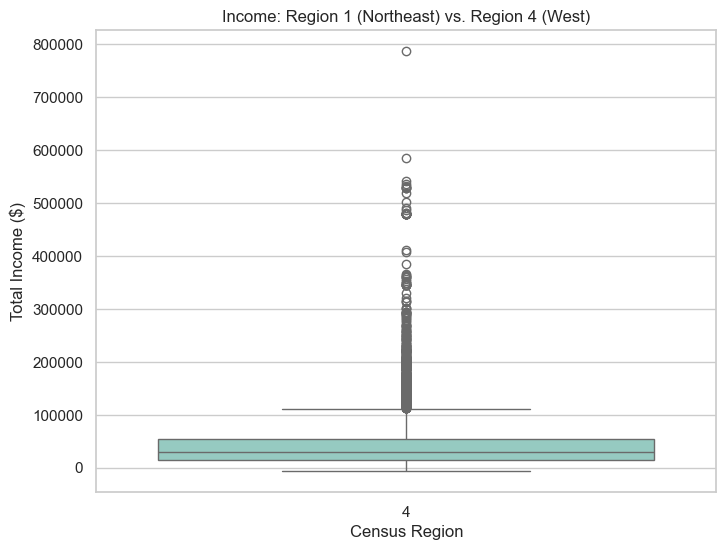

In [226]:
# Visualize
plt.figure(figsize=(8, 6))
sns.boxplot(x='census_region', y='total_income_12m', data=df_subset[df_subset['census_region'].isin([1, 4])], palette='Set3')
plt.title('Income: Region 1 (Northeast) vs. Region 4 (West)')
plt.xlabel('Census Region')
plt.ylabel('Total Income ($)')
plt.show()

### Visualize Mean Total Income by Census Region
This cell visualizes the mean total income by census region with 95% confidence intervals.

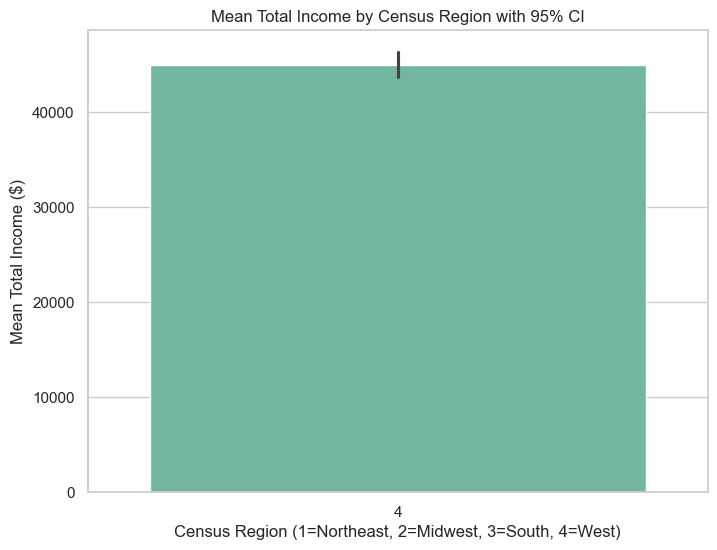

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='census_region', y='total_income_12m', data=df_subset, errorbar='ci', color='blue', palette='Set2')
plt.title('Mean Total Income by Census Region with 95% CI')
plt.xlabel('Census Region (1=Northeast, 2=Midwest, 3=South, 4=West)')
plt.ylabel('Mean Total Income ($)')
plt.show()

### Pairwise Relationships Among Numerical Variables
This cell visualizes the pairwise relationships among numerical variables using a pair plot.

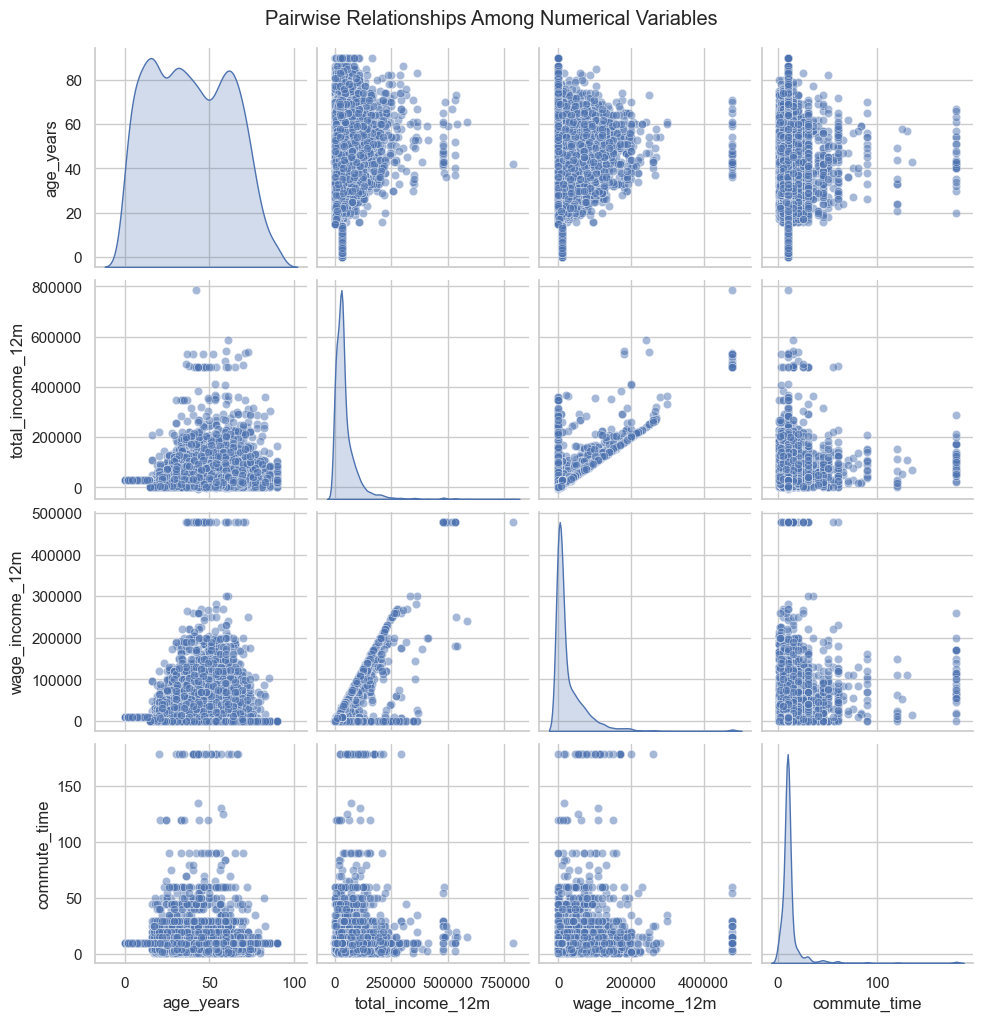

In [228]:
numerical_cols = ['age_years', 'total_income_12m', 'wage_income_12m', 'commute_time']
sns.pairplot(df_subset[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.5}, height=2.5)
plt.suptitle('Pairwise Relationships Among Numerical Variables', y=1.02)
plt.show()